In [14]:
### Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 

In [15]:
### Load in Stock Data
tickers = ['GOOG', 'AAPL']
start_date = '2024-01-01'

def import_stock_data(tickers, start_date):
    # Check if tickers is a list or a single ticker string
    if isinstance(tickers, list):
        data = yf.download(tickers, start=start_date)[['Close', 'High', 'Low']]
    else:
        data = yf.download(tickers, start=start_date)[['Close', 'High', 'Low']]
        data = pd.DataFrame(data)

    # Reset index to make 'Date' a column instead of index
    data.reset_index(inplace=True)
    data['Date'] = pd.to_datetime(data['Date'])

    return data

stock_data = import_stock_data(tickers, start_date)
stock_data

[*********************100%%**********************]  2 of 2 completed


Price        Date       Close                    High                     Low  \
Ticker                   AAPL        GOOG        AAPL        GOOG        AAPL   
0      2024-01-02  185.639999  139.559998  188.440002  140.615005  183.889999   
1      2024-01-03  184.250000  140.360001  185.880005  141.089996  183.429993   
2      2024-01-04  181.910004  138.039993  183.089996  140.634995  180.880005   
3      2024-01-05  181.179993  137.389999  182.759995  138.809998  180.169998   
4      2024-01-08  185.559998  140.529999  185.600006  140.639999  181.500000   
..            ...         ...         ...         ...         ...         ...   
72     2024-04-16  169.380005  156.000000  173.759995  157.229996  168.270004   
73     2024-04-17  168.000000  156.880005  170.649994  158.681000  168.000000   
74     2024-04-18  167.039993  157.460007  168.639999  158.485001  166.550003   
75     2024-04-19  165.000000  155.720001  166.399994  157.990005  164.080002   
76     2024-04-22  165.839996  157.949997  167.259995  159.184998  164.770004   

Price               
Ticker        GOOG  
0       137.740005  
1       138.429993  
2       138.009995  
3       136.850006  
4       137.880005  
..             ...  
72      155.050003  
73      156.134995  
74      156.210007  
75      153.910004  
76      155.660004  

[77 rows x 7 columns]

In [20]:
### Function to Calculate CCI
def calculate_cci(df, window):
    # empty list init
    cci_last_row = []

    # Calculate Typical Price (TP) = (High + Low + Close) / 3
    typ_price = (df['High'] + df['Low'] + df['Close']) / 3 
    # Simple Moving Average (SMA) of TP
    sma = typ_price.rolling(window = window).mean()  
    # Mean Deviation (MD) = absolute difference between the TP and the SMA
    mean_dev = (typ_price - sma).abs().rolling(window=window).mean()  
    # Calculate Commodity Channel Index (CCI) = (TP - SMA) / (0.015 * MD)
    cci = (typ_price - sma) / (0.015 * mean_dev)
    
    # Append last two row values to cci_vals list
    cci_last_row.extend(cci.iloc[-1:].values)
    # extract just the final row of values
    cci_vals = np.array(cci_last_row[0])

    return cci, cci_vals

cci, cci_vals = calculate_cci(stock_data, window=20)
print(cci.tail(5))
print("CCI values list: ", cci_vals)

Ticker        AAPL       GOOG
72      -29.561464  17.629389
73      -63.534586  24.449970
74      -87.033725  23.007905
75     -128.386860   6.049671
76      -99.261369  21.564724
CCI values list:  [-99.26136881  21.56472358]


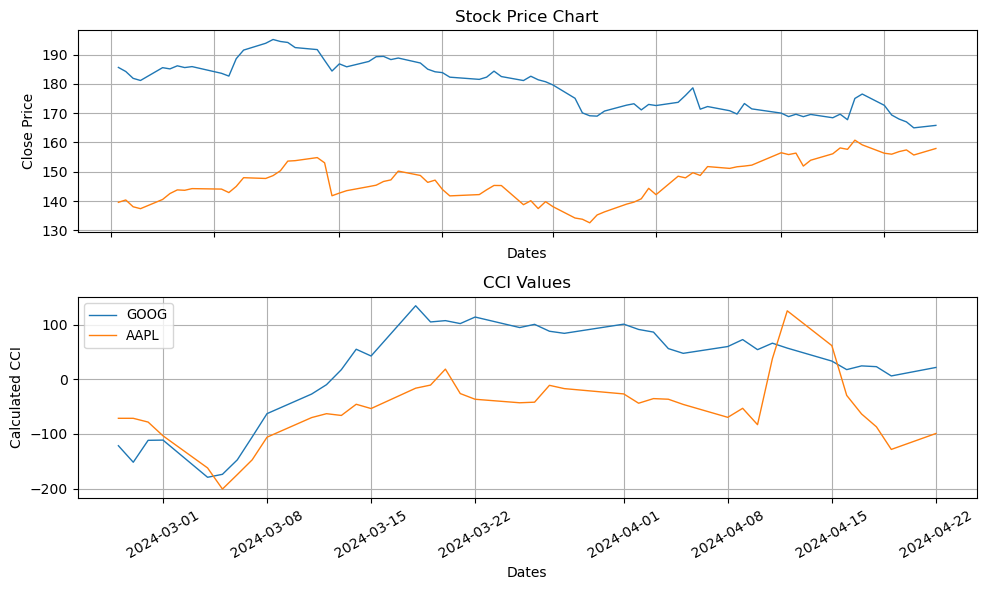

In [17]:
### Plot CCI
# Convert 'Date' column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Filter stock_data and mult_adx based on start_date
start_date = pd.Timestamp('2024-01-01')  # Assuming start_date is '2024-01-01'
filtered_stock_data = stock_data[stock_data['Date'] >= start_date]
filtered_mult_adx = cci[cci.index.isin(filtered_stock_data.index)]

# Plot Stocks Analyzed
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])
plt.plot(filtered_stock_data['Date'], filtered_stock_data['Close'], lw = 1, label = tickers)
plt.title('Stock Price Chart')
plt.ylabel('Close Price')
plt.xlabel('Dates')
plt.grid(True)

# Add ADX Subplot
bx = fig.add_subplot(2, 1, 2)
for t in tickers:
    plt.plot(filtered_stock_data['Date'], filtered_mult_adx[t], lw = 1, label = t)
plt.title('CCI Values')
plt.legend(loc=2, prop={'size': 9.5})
plt.ylabel('Calculated CCI')
plt.xlabel('Dates')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.tight_layout()
plt.show()
